<a href="https://colab.research.google.com/github/dxkkxn/univ-tln/blob/master/TP3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

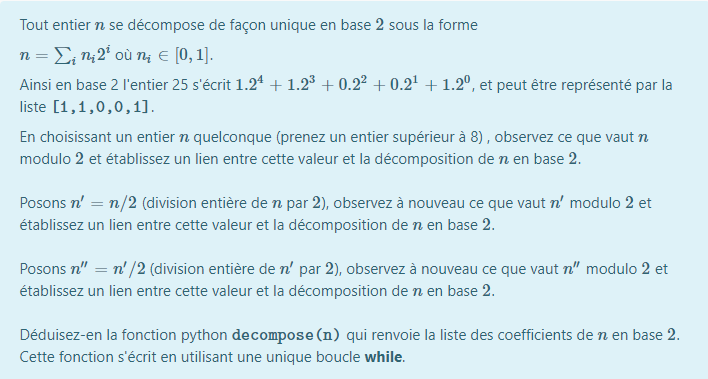

In [ ]:
def decompose(n):
  bin = []
  q = n
  while q != 0:
    bin.insert(0,q%2)
    q = q//2
  return bin

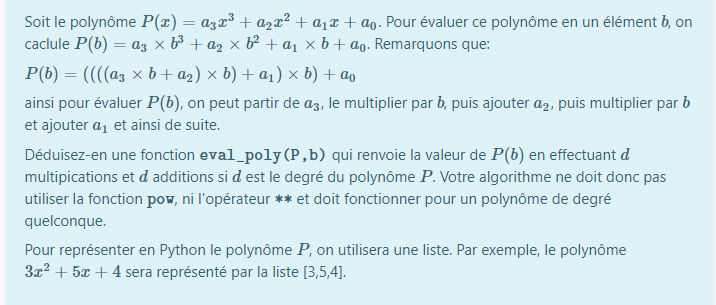

In [ ]:
def eval_poly(P, b): #ne marche que pour poly de degree 2 ou superieur
  eval = P[0]
  i = 1
  while i < len(P) :
    eval = eval*b + P[i]
    i += 1
  return eval

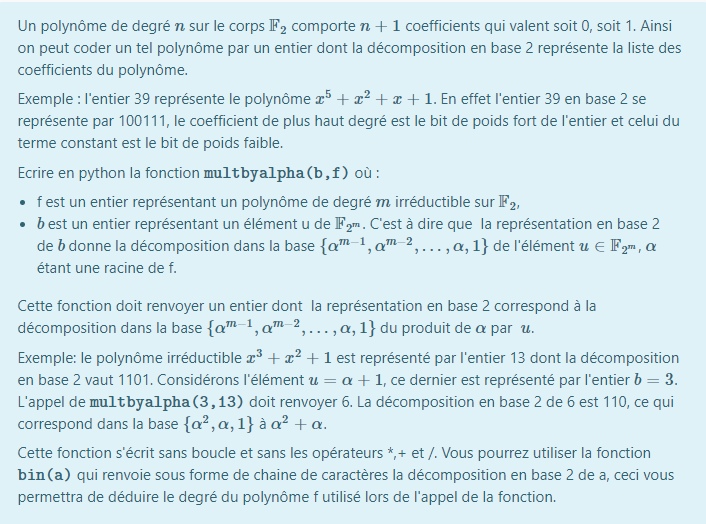

In [ ]:
def multbyalpha(b, f):
  t = b << 1
  n = len(bin(f)) - 3
  if t & (1<<n) != 0:
    return t^f
  else:
    return t

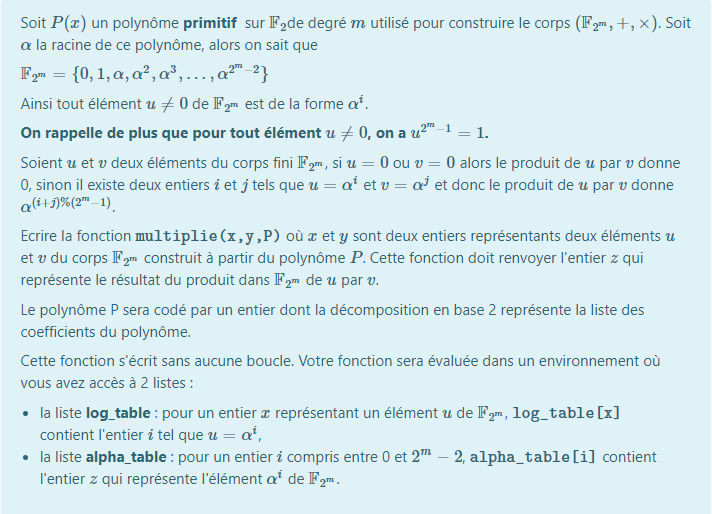

In [ ]:
def multplie(x, y, P):
  r = len(bin(P))-3
  r2=(1<<r)
  if x == 0 or y == 0:
    return 0
  else:
    u = log_table[x]
    v = log_table[y]
    s = (u+v)%(r2 - 1)
    return alpha_table[s]

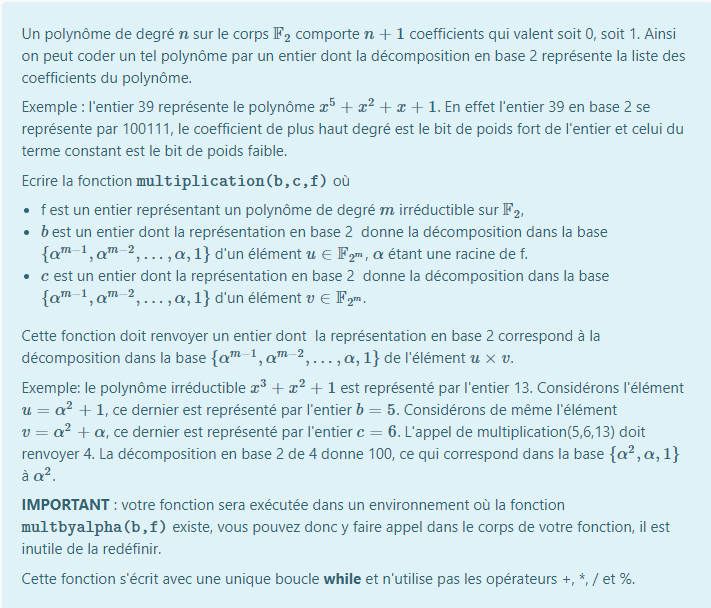

In [ ]:
def multbyalpha(b, f):
  t = b << 1
  n = len(bin(f)) - 3
  if t & (1<<n) != 0:
    return t^f
  else:
    return t
def multiplication(b, c, f):
  res = 0
  t = b
  k = c
  while t != 0:
    if (t & 1) != 0:
      res ^= k
    k = multbyalpha(k,f)
    t = t >> 1
  return res

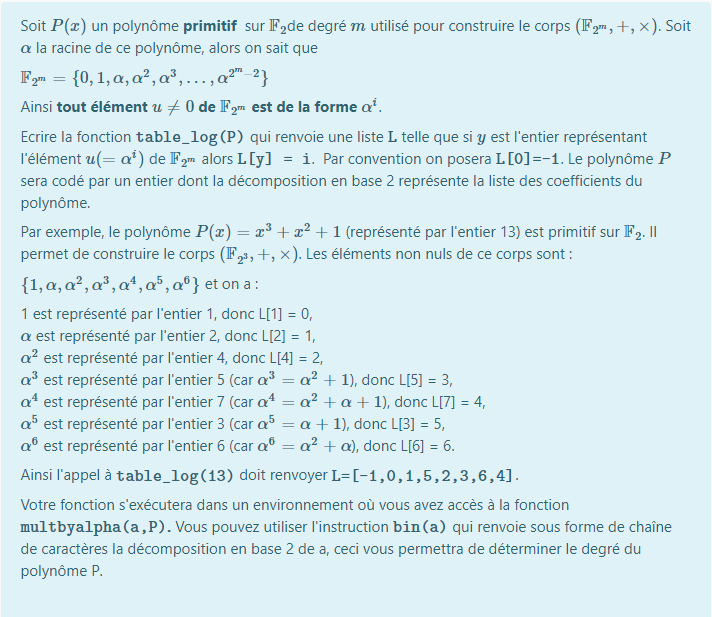

In [ ]:
def table_log(P):
  liste_log = [-1,0,1]
  r = len(bin(P))-3
  elements = 1 << r
  j = 0
  while j < elements - 3:
    liste_log.append(0)
    j += 1
  i = 1
  exp = 1
  while i < elements -1 :
    exp = multbyalpha(exp,P)
    liste_log[exp] = i 
    i += 1
  return liste_log

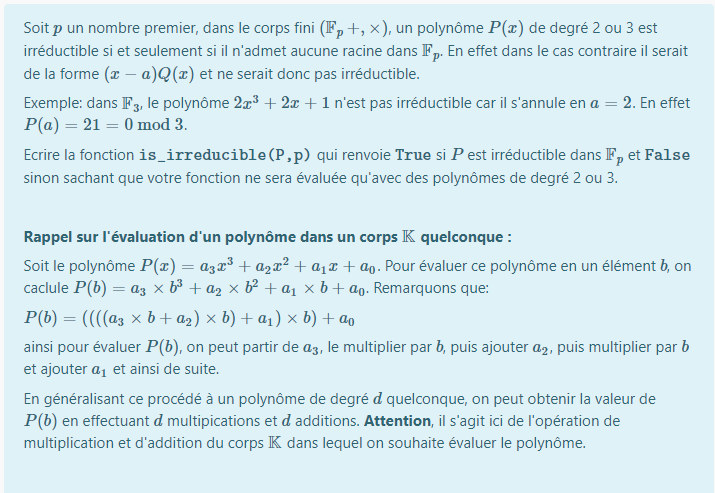

In [ ]:
def is_irreductible(P,p):
  i = 0
  eval = 1
  while (i+1) < p and eval:
    eval = (P[0]*i + P[1])%p
    j = 2
    while j < len(P) :
      eval = (eval*i + P[j])%p
      j += 1
    i += 1
  return bool(eval)

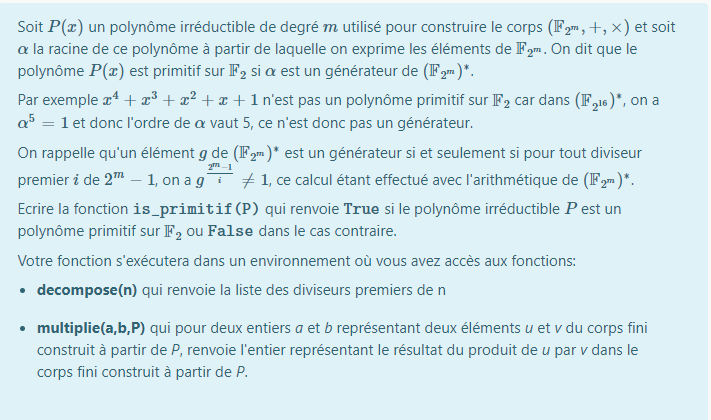

In [ ]:
def is_primitif(P):
  degree_poly = len(P) - 1
  nbr_elements = (1 << degree_poly) - 1 
  div = decompose(nbr_elements)
  i = 0
  while i < len(div):
    exp = nbr_elements/div[i]
    res = 1
    j = 0
    while j < exp:
      res = multiplie(res, 2, P)
      j += 1 
    if res == 1:
      return False
    i += 1
  return True

In [ ]:
def decompose(n):
  bin = []
  q = n
  while q != 0:
    bin.insert(0,q%2)
    q = q//2
  return bin

#print(decompose(9))

def eval_poly(P, b): #ne marche que pour poly de degree 2 ou superieur
  i = 0
  eval = P[i]*b + P[i+1]
  i = i+2
  while i < len(P) :
    eval = eval*b + P[i]
    i += 1
  return eval

#print(eval_poly([3,5,4],2))
#print(3*(2**2)+5*2+4)


def multbyalpha(b, f):
  t = b << 1
  n = len(bin(f)) - 3
  if t & (1<<n) != 0:
    return t^f
  else:
    return t

#print(multbyalpha(7, 13))

def multplie(x, y, P):
  r = len(bin(P))-2
  r2=(1<<r)
  if x == 0 or y == 0:
    return 0
  else:
    u = log_table[x]
    v = log_table[y]
    s = (u+v)%(r2 - 1)
    return alpha_table[s]

def multiplication(b, c, f):
  res = 0
  t = b
  k = c
  while t != 0:
    if (t & 1) != 0:
      res ^= k
    k = multbyalpha(k,f)
    t = t >> 1
  return res
print(multiplication(6,3,11) )

#def table_log(P):

def table_log(P):
  liste_log = [-1,0,1]
  r = len(bin(P))-3
  elements = 1 << r
  j = 0
  while j < elements - 3:
    liste_log.append(0)
    j += 1
  i = 1
  exp = 1
  while i < elements -1 :
    exp = multbyalpha(exp,P)
    liste_log[exp] = i 
    i += 1
  return liste_log
#print(table_log(19))

def is_irreductible(P,p):
  i = 0
  eval = 1
  while (i+1) < p and eval:
    eval = (P[0]*i + P[1])%p
    j = 2
    while j < len(P) :
      eval = (eval*i + P[j])%p
      j += 1
    i += 1
  return bool(eval)

# print(is_irreductible([1, 21, 0],23),
#  is_irreductible([1, 0, 3, 3],5),
#  is_irreductible([1, 0, 2, 0],29),
#  is_irreductible([1, 6, 0, 0],7),
#  is_irreductible([1, 2, 0],3),
#  is_irreductible([1, 18, 2],19),
#  is_irreductible([1, 1, 0],2),
#  is_irreductible([1, 12, 2],13),
#  is_irreductible([1, 7, 2],11),
#  is_irreductible([1, 1, 15],17))

def decomposePremiers(n):
  listePremier = []
  if n%2 == 0:
    listePremier += [2]
  while n%2 == 0:
    n = n//2
  i = 3
  while n != 1 :
    if n%i == 0 :
      listePremier += [i]
    while n % i == 0 :
      n = n // i
    i += 2
  return listePremier

def listBinToInt(liste):
  i = 0
  n_rep = 0
  while i < len(liste):
    n_rep += liste[-i-1]<<i
    i += 1
  return n_rep

def is_primitif(P):
  degree_poly = len(P) - 1
  nbr_elements = (1 << degree_poly) - 1 
  div = decompose(nbr_elements)
  i = 0
  while i < len(div):
    exp = nbr_elements/div[i]
    res = 1
    j = 0
    while j < exp:
      res = multiplie(res, 2, P)
      j += 1 
    if res == 1:
      return False
    i += 1
  return True

def a_exp(exp, expmin, P):
  exp1 = exp//2
  exp2 = exp//2 + 1
  if exp1 < expmin and exp2 < expmin:
    mult_a = 1 << int(exp1)
    mult_b = 1 << int(exp2)
    return multiplie(mult_a, mult_b, P)
  return (multiplie(a_exp(exp1, expmin, P), a_exp(exp2, expmin, P),P))
                   

def is_primitif(P):
  degree_poly = len(P) - 1
  nbr_elements = (1 << degree_poly) - 1 
  div = decompose(nbr_elements)
  i = 0
  while i < len(div):
    exp = nbr_elements/div[i]
    res = a_exp(exp, degree_poly, P)
    if res == 1:
      return False
    i+= 1
  return True

# print(is_primitif([1, 0, 1, 1, 0, 1, 1]),"\n",
#  is_primitif([1, 0, 0, 0, 1, 1, 1, 0, 1]),"\n",
#   is_primitif([1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1]),"\n",
#   is_primitif([1, 0, 0, 0, 1, 1, 0, 1, 1]),"\n",
#   is_primitif([1, 0, 0, 1, 1]),"\n",
#   is_primitif([1, 0, 0, 0, 0, 1, 0, 0, 0, 1]),"\n",
#  is_primitif([1, 0, 0, 1, 0, 1]),"\n",
#  is_primitif([1, 1, 1, 1, 1]))
# print(listBinToInt([1, 1, 1, 0, 1, 0, 1]))
# print(is_primitif([1, 1, 1, 0, 1, 0, 1]))

print(4&1)



1
0


In [ ]:
print(4&1)

0
